# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Base url and use units as metric
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{base_url}&appid={weather_api_key}&units={units}&q="

# Set lists to append data for DataFrame
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
existing_city = []

count = 0
set_processing = 1

# Loop through list of cities and print log
for city in cities:
    response = requests.get(query_url + city).json()
    
    # adding excepting handling
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        # setting the set limit
        if count > 50:
            count = 1
            set_processing += 1
            existing_city.append(city)
        else:
            count += 1
            existing_city.append(city)
        print(f"Processing Record {count} of Set {set_processing} for {city}")
    except (KeyError, IndexError):
        print("City not found, skipping...")

print("----Data Retrieval Complete----")


City not found, skipping...
Processing Record 1 of Set 1 for ushuaia
Processing Record 2 of Set 1 for port hedland
Processing Record 3 of Set 1 for victoria
Processing Record 4 of Set 1 for georgetown
Processing Record 5 of Set 1 for qaanaaq
Processing Record 6 of Set 1 for clyde river
City not found, skipping...
Processing Record 7 of Set 1 for yerbogachen
Processing Record 8 of Set 1 for port hardy
City not found, skipping...
Processing Record 9 of Set 1 for pochutla
Processing Record 10 of Set 1 for bitung
Processing Record 11 of Set 1 for westport
Processing Record 12 of Set 1 for havoysund
Processing Record 13 of Set 1 for khatanga
Processing Record 14 of Set 1 for mataura
Processing Record 15 of Set 1 for alofi
Processing Record 16 of Set 1 for nikolskoye
City not found, skipping...
Processing Record 17 of Set 1 for akhalgori
Processing Record 18 of Set 1 for udachnyy
Processing Record 19 of Set 1 for hithadhoo
City not found, skipping...
Processing Record 20 of Set 1 for rikitea

Processing Record 28 of Set 4 for lavrentiya
Processing Record 29 of Set 4 for rockport
Processing Record 30 of Set 4 for norman wells
Processing Record 31 of Set 4 for volovo
Processing Record 32 of Set 4 for vardo
Processing Record 33 of Set 4 for beyneu
Processing Record 34 of Set 4 for jerez
Processing Record 35 of Set 4 for florida
Processing Record 36 of Set 4 for nishihara
Processing Record 37 of Set 4 for severo-kurilsk
Processing Record 38 of Set 4 for arraial do cabo
Processing Record 39 of Set 4 for umm kaddadah
Processing Record 40 of Set 4 for yeniseysk
Processing Record 41 of Set 4 for henties bay
Processing Record 42 of Set 4 for ghanaur
Processing Record 43 of Set 4 for redlands
Processing Record 44 of Set 4 for gurupi
Processing Record 45 of Set 4 for sao joao do piaui
Processing Record 46 of Set 4 for ostrovnoy
Processing Record 47 of Set 4 for tunceli
Processing Record 48 of Set 4 for flin flon
Processing Record 49 of Set 4 for olafsvik
Processing Record 50 of Set 4 

Processing Record 6 of Set 8 for egvekinot
Processing Record 7 of Set 8 for tairua
Processing Record 8 of Set 8 for thoen
Processing Record 9 of Set 8 for bambous virieux
Processing Record 10 of Set 8 for korla
Processing Record 11 of Set 8 for ateli
Processing Record 12 of Set 8 for hobyo
Processing Record 13 of Set 8 for mujiayingzi
Processing Record 14 of Set 8 for svay rieng
Processing Record 15 of Set 8 for anju
Processing Record 16 of Set 8 for kenai
Processing Record 17 of Set 8 for rovaniemi
City not found, skipping...
Processing Record 18 of Set 8 for mantua
Processing Record 19 of Set 8 for manyana
Processing Record 20 of Set 8 for ambilobe
Processing Record 21 of Set 8 for fare
Processing Record 22 of Set 8 for saint-augustin
Processing Record 23 of Set 8 for shache
Processing Record 24 of Set 8 for jinchang
Processing Record 25 of Set 8 for sterling
Processing Record 26 of Set 8 for saint-georges
Processing Record 27 of Set 8 for lalibela
Processing Record 28 of Set 8 for k

Processing Record 31 of Set 11 for sao gabriel da cachoeira
Processing Record 32 of Set 11 for tabou
Processing Record 33 of Set 11 for tequisquiapan
Processing Record 34 of Set 11 for banda aceh
Processing Record 35 of Set 11 for constitucion
Processing Record 36 of Set 11 for ulladulla
Processing Record 37 of Set 11 for eydhafushi
City not found, skipping...
Processing Record 38 of Set 11 for belmonte
Processing Record 39 of Set 11 for porto velho
Processing Record 40 of Set 11 for praia
Processing Record 41 of Set 11 for launceston
Processing Record 42 of Set 11 for whitehorse
Processing Record 43 of Set 11 for mana
----Data Retrieval Complete----


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a DataFrame from the raw data and export to csv
weather_df = pd.DataFrame({"City":existing_city,"Lat":lat,"Lng":lng,"Max temp":max_temp,"Humidity":humidity,\
                           "Cloudiness":cloudiness,"Wind Speed":wind_speed,"Country":country,"Date":date})
weather_df["Date"] = pd.to_datetime(weather_df["Date"],unit='s').dt.strftime("%Y-%m-%d")
weather_df.to_csv("output_data/Weatherpy.csv")
weather_df.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,48.20,81,75,10.36,AR,2021-02-02
1,port hedland,-20.3167,118.5667,82.40,94,75,16.11,AU,2021-02-02
2,victoria,22.2855,114.1577,71.01,81,0,3.67,HK,2021-02-02
3,georgetown,5.4112,100.3354,82.00,74,20,5.75,MY,2021-02-02
4,qaanaaq,77.4840,-69.3632,-8.88,74,78,4.23,GL,2021-02-02


In [30]:
# Checking that all cities are unique
weather_df["City"].nunique()

553

In [7]:
# Summary statistics on DataFrame
weather_df.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000
mean,20.478856,20.461541,48.725696,75.594937,57.345389,8.507432
std,33.158729,90.195145,31.908257,17.643473,40.082230,5.933919
min,-54.800000,-179.166700,-47.920000,19.000000,0.000000,0.400000
25%,-6.766900,-57.557500,28.000000,68.000000,14.000000,3.870000
50%,22.933300,25.716700,59.000000,80.000000,75.000000,7.360000
75%,49.166700,97.750000,75.200000,88.000000,98.000000,11.500000
max,78.218600,179.316700,96.800000,100.000000,100.000000,31.210000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Find cities that have greater than 100%
high_humidity = weather_df.loc[weather_df["Humidity"] > 100]
high_humidity.count()

City          0
Lat           0
Lng           0
Max temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

## No cities have greater than 100% humidity in this selection

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

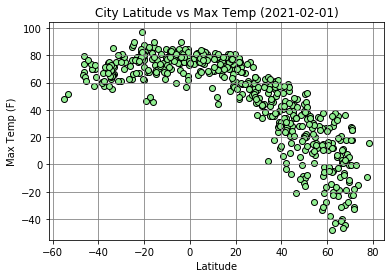

In [9]:
# Create a scattor plot of latitude vs temperature
x = weather_df["Lat"]
y = weather_df["Max temp"]
plt.scatter(x,y,edgecolors="black",facecolors="lightgreen")
plt.title("City Latitude vs Max Temp (2021-02-01)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("output_data/City_vs_MaxTemp_20210201")
plt.show()

### The code for the above scatter plot is taking the Latitude from the Weather DataFrame created and plotting it against the Max Temp (F) for that city. At the lower latitude points of -60 there is a higher max temperature with the temperature decreasing as the Latitude reaches +80.

## Latitude vs. Humidity Plot

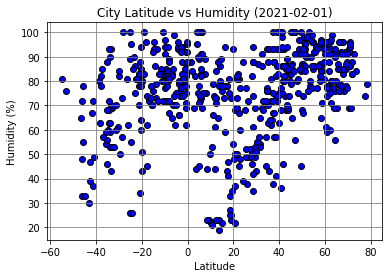

In [10]:
x = weather_df["Lat"]
y = weather_df["Humidity"]
plt.scatter(x,y,edgecolors="black",facecolors="blue")
plt.title("City Latitude vs Humidity (2021-02-01)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("output_data/City_vs_Humidity_20210201")
plt.show()

### The code for the above scatter plot is taking the Latitude from the Weather DataFrame created and plotting it against the Humidity % for that city. Looking at the graph there is not a strong correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

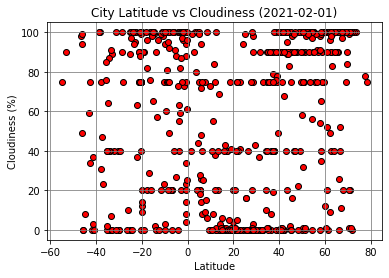

In [11]:
x = weather_df["Lat"]
y = weather_df["Cloudiness"]
plt.scatter(x,y,edgecolors="black",facecolors="red")
plt.title("City Latitude vs Cloudiness (2021-02-01)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("output_data/City_vs_Cloudiness_20210201")
plt.show()

### The code for the above scatter plot is taking the Latitude from the Weather DataFrame created and plotting it against the cloudiness for that city. Looking at the graph there is not a strong correlation between latitude and cloudiness, however there appear to be either a lot of no clouds or 100% cloud cover for the cities on this date.

## Latitude vs. Wind Speed Plot

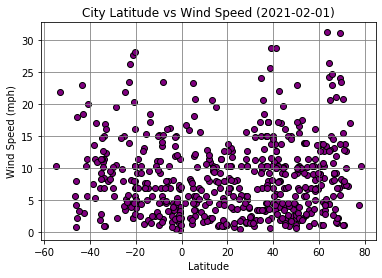

In [12]:
x = weather_df["Lat"]
y = weather_df["Wind Speed"]
plt.scatter(x,y,edgecolors="black",facecolors="purple")
plt.title("City Latitude vs Wind Speed (2021-02-01)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("output_data/City_vs_WindSpeed_20210201")
plt.show()

### The code for the above scatter plot is taking the Latitude from the Weather DataFrame created and plotting it against the wind speed for that city. Looking at the graph there is not a strong correlation between latitude and wind speend, however the lower latitude around -60 had a very windy day with over 35 mph wind. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.85


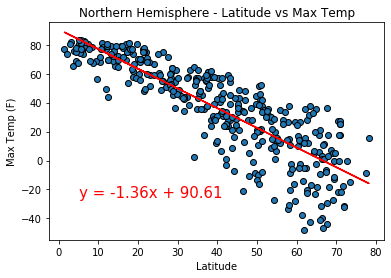

In [22]:
# Calculate the r value
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
x_north = northern_hemisphere["Lat"]
y_north = northern_hemisphere["Max temp"]
correlation = st.pearsonr(x_north,y_north)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_north,y_north,edgecolors="black")
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(5,-25),fontsize=15,color="red")
plt.title("Northern Hemisphere - Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("output_data/NorthernHemisphere_MaxTemp")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.42


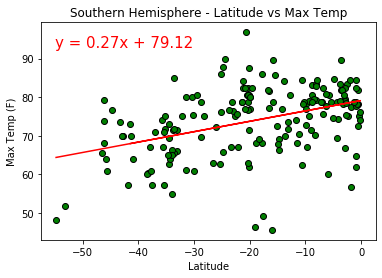

In [14]:
# Calculate the r value
southern_hemisphere = weather_df.loc[weather_df["Lat"] <= 0]
x_south = southern_hemisphere["Lat"]
y_south = southern_hemisphere["Max temp"]
correlation = st.pearsonr(x_south,y_south)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_south,y_south,edgecolors="black",facecolors="green")
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(-55,93),fontsize=15,color="red")
plt.title("Southern Hemisphere - Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("output_data/SouthernHemisphere_MaxTemp")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.42


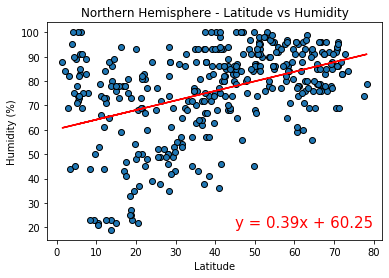

In [15]:
# Calculate the r value
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
x_north = northern_hemisphere["Lat"]
y_north = northern_hemisphere["Humidity"]
correlation = st.pearsonr(x_north,y_north)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_north,y_north,edgecolors="black")
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.title("Northern Hemisphere - Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/NorthernHemisphere_Humidity")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.46


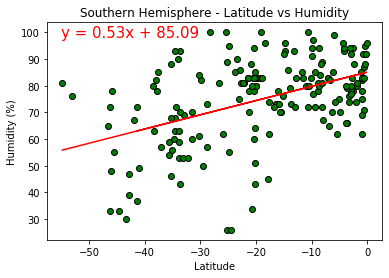

In [23]:
# Calculate the r value
southern_hemisphere = weather_df.loc[weather_df["Lat"] <= 0]
x_south = southern_hemisphere["Lat"]
y_south = southern_hemisphere["Humidity"]
correlation = st.pearsonr(x_south,y_south)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_south,y_south,edgecolors="black",facecolors="green")
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(-55,98),fontsize=15,color="red")
plt.title("Southern Hemisphere - Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/SouthernHemisphere_Humidity")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.45


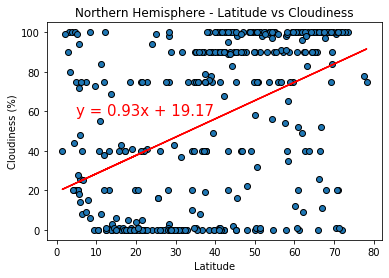

In [25]:
# Calculate the r value
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
x_north = northern_hemisphere["Lat"]
y_north = northern_hemisphere["Cloudiness"]
correlation = st.pearsonr(x_north,y_north)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_north,y_north,edgecolors="black")
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(5,58),fontsize=15,color="red")
plt.title("Northern Hemisphere - Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/NorthernHemisphere_Cloudiness")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.22


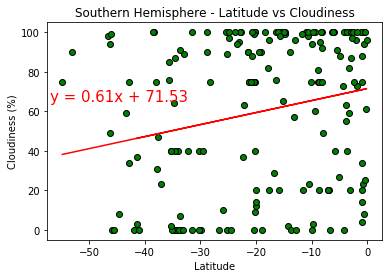

In [18]:
# Calculate the r value
southern_hemisphere = weather_df.loc[weather_df["Lat"] <= 0]
x_south = southern_hemisphere["Lat"]
y_south = southern_hemisphere["Cloudiness"]
correlation = st.pearsonr(x_south,y_south)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_south,y_south,edgecolors="black",facecolors="green")
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(-57,65),fontsize=15,color="red")
plt.title("Southern Hemisphere - Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/SouthernHemisphere_Cloudiness")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.15


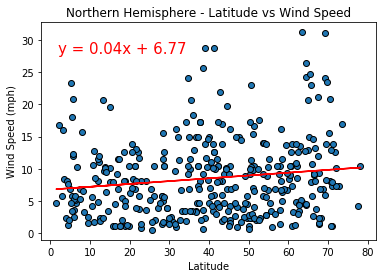

In [27]:
# Calculate the r value
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
x_north = northern_hemisphere["Lat"]
y_north = northern_hemisphere["Wind Speed"]
correlation = st.pearsonr(x_north,y_north)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values = x_north * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_north,y_north,edgecolors="black")
plt.plot(x_north,regress_values,"r-")
plt.annotate(line_eq,(2,28),fontsize=15,color="red")
plt.title("Northern Hemisphere - Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/NorthernHemisphere_WindSpeed")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.25


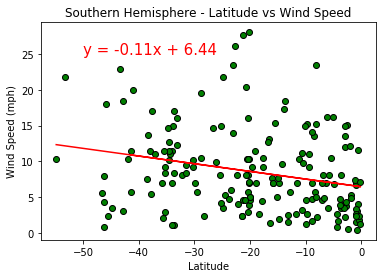

In [29]:
# Calculate the r value
y_value = "Wind Speed"
southern_hemisphere = weather_df.loc[weather_df["Lat"] <= 0]
x_south = southern_hemisphere["Lat"]
y_south = southern_hemisphere[y_value]
correlation = st.pearsonr(x_south,y_south)
print(f"The r-value is: {round(correlation[0],2)}")

# Create a scattor plot with the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_south, y_south)
regress_values = x_south * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_south,y_south,edgecolors="black",facecolors="green")
plt.plot(x_south,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.title(f"Southern Hemisphere - Latitude vs {y_value}")
plt.xlabel("Latitude")
plt.ylabel(f"{y_value} (mph)")
plt.savefig(f"output_data/SouthernHemisphere_{y_value}")
plt.show()